In [5]:
from Artifact import Artifact, Transmuter
import numpy as np
a = Artifact(slot='Goblet', main_stat='PyroDMG%')
print(a)
a.level_up()
print(a)
a.level_up()
print(a)
a.level_up()
print(a)
a.level_up()
print(a)
a.level_up()
print(a)

══════════════════════════════
✦ Goblet (Lv. 0) (exp total: 0)
✦ Main: PyroDMG%
✦ Substats:
  ▪ ATK: 15.56 
  ▪ DEF: 20.83 
  ▪ HP%: 5.25 
══════════════════════════════
══════════════════════════════
✦ Goblet (Lv. 4) (exp total: 0)
✦ Main: PyroDMG%
✦ Substats:
  ▪ ATK: 15.56 
  ▪ DEF: 20.83 
  ▪ HP%: 5.25 
  ▪ DEF%: 6.56 
══════════════════════════════
══════════════════════════════
✦ Goblet (Lv. 8) (exp total: (44, 725))
✦ Main: PyroDMG%
✦ Substats:
  ▪ ATK: 15.56 
  ▪ DEF: 20.83 
  ▪ HP%: 11.08 +1
  ▪ DEF%: 6.56 
══════════════════════════════
══════════════════════════════
✦ Goblet (Lv. 12) (exp total: (87, 150))
✦ Main: PyroDMG%
✦ Substats:
  ▪ ATK: 15.56 
  ▪ DEF: 20.83 
  ▪ HP%: 11.08 +1
  ▪ DEF%: 13.85 +1
══════════════════════════════
══════════════════════════════
✦ Goblet (Lv. 16) (exp total: (153, 300))
✦ Main: PyroDMG%
✦ Substats:
  ▪ ATK: 15.56 
  ▪ DEF: 41.66 +1
  ▪ HP%: 11.08 +1
  ▪ DEF%: 13.85 +1
══════════════════════════════
══════════════════════════════
✦ Goblet (L

In [30]:
if any(stat in list(a.sub_stats) for stat in ['CRIT Rate%','CRIT DMG%']):
    print('yes')

yes


In [17]:
len(a.sub_stats) > 3

True

In [1]:
# Necessary Imports
from Artifact import Artifact, Transmuter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Generate normal artifacts
sanctifying_cost = {'Feather':1, 'Flower':1, 'Sands':2, 'Circlet':3, 'Goblet':4}
main_stats = {'Feather': 'ATK', 'Flower': 'HP', 'Sands':'ATK%', 'Circlet':'CRIT Rate%', 'Goblet':'Pyro DMG%'}
crit = {'CRIT Rate%':[2.72, 3.11, 3.50, 3.89], 'CRIT DMG%':[5.44, 6.22, 6.99, 7.77]}
simulations = 1000
normal_results = {'Feather':[], 'Flower':[], 'Sands':[], 'Circlet':[], 'Goblet':[]}

for _ in range(simulations):
    for i in list(sanctifying_cost):

        # Generate artifacts until a 30 cv artifact has been reached.
        # Get the total exp used to get to that 30 cv artifact
        total_exp = 0
        while True:
            crit_rate = np.random.choice(crit['CRIT Rate%'])
            crit_dmg = np.random.choice(crit['CRIT DMG%'])
            # If circlet, look for 1 crit sub stat as the main stat is crit. You could switch the crit types but it would be the same.
            if i == 'Circlet':
                sample = Artifact(slot=i, main_stat='CRIT Rate%')
                if len(sample.sub_stats) == 3:
                    sample.level_up()
                if not 'CRIT DMG%' in sample.sub_stats:
                    total_exp += sample.exp
                    continue
                sample.level_up_max()
                total_exp += sample.exp
                if sample.crit_value() >= 20:
                    break    
            else:
                # Look for 2 crit substats
                x = {'CRIT Rate%':crit_rate}
                y = {'CRIT DMG%':crit_dmg}
                sample = Artifact(slot=i, main_stat=main_stats[i], sub_stats=np.random.choice([x, y]))
                if len(sample.sub_stats) == 3:
                    sample.level_up()
                if not all(stat in list(sample.sub_stats) for stat in ['CRIT Rate%','CRIT DMG%']):
                    total_exp += sample.exp
                    continue
                sample.level_up_max()
                total_exp += sample.exp
                if sample.crit_value() >= 30:
                    break    
        normal_results[i].append(total_exp) 

        

In [53]:
print('Mean artifact exp cost for feather: ', np.mean(normal_results['Feather']))
print('Mean artifact exp cost for flower: ', np.mean(normal_results['Flower']))
print('Mean artifact exp cost for sands: ', np.mean(normal_results['Sands']))
print('Mean artifact exp cost for circlet: ', np.mean(normal_results['Circlet']))
print('Mean artifact exp cost for goblet: ', np.mean(normal_results['Goblet']))


Mean artifact exp cost for feather:  897342.5
Mean artifact exp cost for flower:  922034.7
Mean artifact exp cost for sands:  882133.75
Mean artifact exp cost for circlet:  1758756.125
Mean artifact exp cost for goblet:  897099.15


In [172]:
# Use transmuter
sanctifying_cost = {'Feather':1, 'Flower':1, 'Sands':2, 'Circlet':3, 'Goblet':4}
main_stats = {'Feather': 'ATK', 'Flower': 'HP', 'Sands':'ATK%', 'Circlet':'CRIT Rate%', 'Goblet':'Pyro DMG%'}
crit = {'CRIT Rate%':[2.72, 3.11, 3.50, 3.89], 'CRIT DMG%':[5.44, 6.22, 6.99, 7.77]}
simulations = 1000
transmuter_results = {'Feather':[], 'Flower':[], 'Sands':[], 'Circlet':[], 'Goblet':[]}

for _ in range(simulations):
    for i in list(sanctifying_cost):
        total_exp = 0
        while True:
            total_exp += 16300 * sanctifying_cost[i] * 25
            crit_rate = np.random.choice(crit['CRIT Rate%'])
            crit_dmg = np.random.choice(crit['CRIT DMG%'])
            if i == 'Circlet':
                sample = Transmuter(slot=i, main_stat='CRIT Rate%',affix1='CRIT DMG%', affix2='ATK')
                sample.level_up_max()
                total_exp += sample.exp
                if sample.crit_value() >= 30:
                    break
            else:
                # Look for 2 crit substats
                x = {'CRIT Rate%':crit_rate}
                y = {'CRIT DMG%':crit_dmg}
                sample = Transmuter(slot=i, main_stat=main_stats[i], affix1='CRIT DMG%', affix2='CRIT Rate%')
                if len(sample.sub_stats) == 3:
                    sample.level_up()
                if not all(stat in list(sample.sub_stats) for stat in ['CRIT Rate%','CRIT DMG%']):
                    total_exp += sample.exp
                    continue
                sample.level_up_max()
                total_exp += sample.exp
                if sample.crit_value() >= 30:
                    break    
        transmuter_results[i].append(total_exp)  




In [163]:
sample = Transmuter(slot=i, main_stat=main_stats[i], affix1='CRIT DMG%', affix2='CRIT Rate%')
sample.level_up_max()
print(sample)
sample = Transmuter(slot=i, main_stat=main_stats[i], affix1='CRIT DMG%', affix2='CRIT Rate%')
sample.level_up_max()
print(sample)

══════════════════════════════
✦ Goblet (Lv. 20) (exp total: 270475)
✦ Main: ATK%
✦ Substats:
  ▪ CRIT DMG%: 12.44 +1
  ▪ CRIT Rate%: 13.22 +3
  ▪ DEF%: 7.29 
  ▪ EM: 23.31 
══════════════════════════════
══════════════════════════════
✦ Goblet (Lv. 20) (exp total: 270475)
✦ Main: ATK%
✦ Substats:
  ▪ CRIT DMG%: 11.66 +1
  ▪ CRIT Rate%: 5.83 +1
  ▪ HP: 776.75 +2
  ▪ DEF: 39.35 +1
══════════════════════════════


In [173]:
print('Mean artifact exp cost for feather: ', np.mean(transmuter_results['Feather']))
print('Mean artifact exp cost for flower: ', np.mean(transmuter_results['Flower']))
print('Mean artifact exp cost for sands: ', np.mean(transmuter_results['Sands']))
print('Mean artifact exp cost for circlet: ', np.mean(transmuter_results['Circlet']))
print('Mean artifact exp cost for goblet: ', np.mean(transmuter_results['Goblet']))

Mean artifact exp cost for feather:  888825.225
Mean artifact exp cost for flower:  892215.1
Mean artifact exp cost for sands:  1406775.6
Mean artifact exp cost for circlet:  341013405.7
Mean artifact exp cost for goblet:  2546636.5


In [176]:
len(normal_results['Feather'])
len(transmuter_results['Feather'])
vals, counts = np.unique(transmuter_results['Feather'], return_counts=True)
print("Unique values:", vals)

Unique values: [ 677975 1355950 2033925 2711900 3389875 4745825]


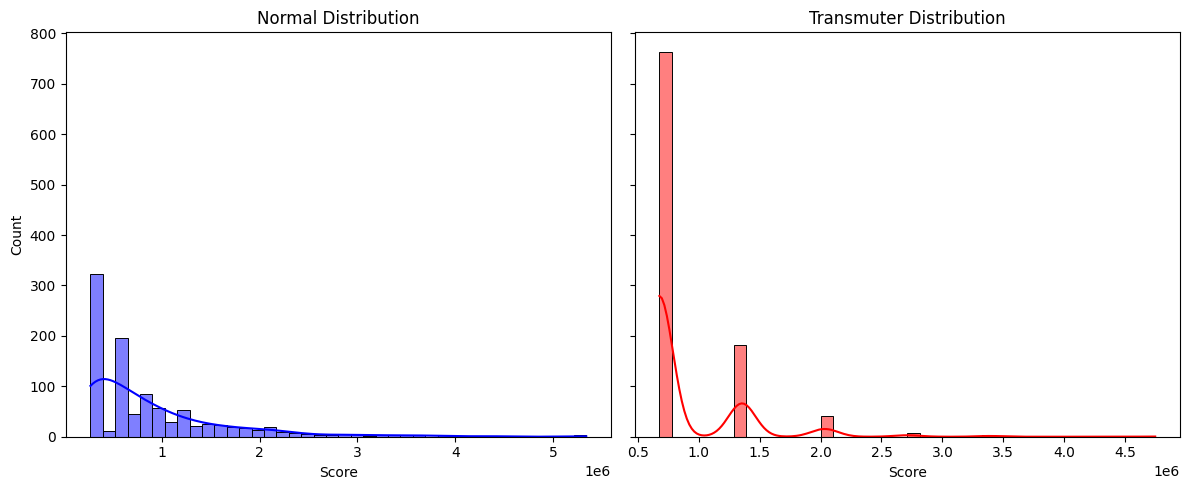

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Plot overlapping histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# First plot: Normal
sns.histplot(normal_results['Feather'], bins=40, ax=axes[0], color='blue', kde=True)
axes[0].set_title('Normal Distribution')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')

# Second plot: Transmuter
sns.histplot(transmuter_results['Feather'], bins=40, ax=axes[1], color='red', kde=True)
axes[1].set_title('Transmuter Distribution')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()

# Show plot
plt.show()

In [178]:
simulations = 5000000
results = 0
for _ in range(simulations):
    a = Artifact()
    if a.slot == 'Circlet' and a.main_stat == 'CRIT Rate%':
        if len(a.sub_stats) == 3:
            a.level_up()
        if a.crit_value() > 0:
            results += 1
        continue

    if a.slot == 'Circlet' and a.main_stat == 'CRIT DMG%':
        if len(a.sub_stats) == 3:
            a.level_up()
        if a.crit_value() > 0:
            results += 1
        continue

In [183]:
round((results/simulations), 2)
results

49855

In [186]:
import numpy as np

STAT_HP = 2
STAT_CRIT_RATE = 8
STAT_CRIT_DMG = 9

ROLL_VALUES = np.array([
    [209.12, 239.00, 268.88, 298.75],  # HP
    [4.08, 4.66, 5.25, 5.83],          # HP%
    [16.20, 18.52, 20.83, 23.15],      # DEF
    [5.10, 5.83, 6.56, 7.29],          # DEF%
    [13.62, 15.56, 17.51, 19.45],      # ATK
    [4.08, 4.66, 5.25, 5.83],          # ATK%
    [4.53, 5.18, 5.83, 6.48],          # ER%
    [16.32, 18.65, 20.98, 23.31],      # EM
    [2.72, 3.11, 3.50, 3.89],          # CRIT Rate%
    [5.44, 6.22, 6.99, 7.77],          # CRIT DMG%
])

STAT_WEIGHTS = np.array([6, 4, 6, 4, 6, 4, 4, 4, 3, 3])
STAT_PROBS = STAT_WEIGHTS / STAT_WEIGHTS.sum()

def simulate_artifact():
    # Simulate slot: 0 = Circlet (only care about that)
    is_circlet = np.random.rand() < 0.2
    if not is_circlet:
        return 0

    # Simulate Circlet main stat
    circlet_probs = np.array([0.22, 0.22, 0.22, 0.10, 0.10, 0.10, 0.04])
    circlet_main_choices = [1, 5, 3, 8, 9, -1, 7]
    main_stat = np.random.choice(circlet_main_choices, p=circlet_probs)
    if main_stat not in (STAT_CRIT_RATE, STAT_CRIT_DMG):
        return 0

    # Simulate number of substats (3 or 4)
    substat_count = 3 if np.random.rand() < 0.8 else 4

    # Choose substats (excluding main stat)
    stat_pool = np.setdiff1d(np.arange(10), [main_stat])
    substats = np.random.choice(stat_pool, size=substat_count, replace=False, p=STAT_PROBS[stat_pool] / STAT_PROBS[stat_pool].sum())

    # Create substat value array
    values = np.zeros(10)
    for stat in substats:
        values[stat] += np.random.choice(ROLL_VALUES[stat])

    # Add one upgrade if started with 3 substats
    if substat_count == 3:
        upgrade_stat = np.random.choice(substats)
        values[upgrade_stat] += np.random.choice(ROLL_VALUES[upgrade_stat])

    # Check if HP% is among substats
    has_hp_percent = STAT_HP in substats

    # Compute crit value
    crit_value = values[STAT_CRIT_RATE] * 2 + values[STAT_CRIT_DMG]

    return int(crit_value > 0 and has_hp_percent)

def run_simulation(n):
    return sum(simulate_artifact() for _ in range(n))

results = run_simulation(5_000_000)
print("Valid Circlet crit artifacts:", results)

Valid Circlet crit artifacts: 17621


In [187]:
49855/5000000

0.009971

| Base Piece | Main Stat          | Double Crit | Drops / Run | Chance / Run | Avg Runs | Resin Value | Days  | Days (+Mora) | Elixers | Resin/Elixer |
|------------|--------------------|-------------|--------------|---------------|-----------|--------------|-------|----------------|----------|----------------|
| Flower     | Flat HP            | 9.2%        | 1.065        | 0.980%        | 102       | 2,041        | 10.8  | 13.5           | 1        | 2,041          |
| Feather    | Flat ATK           | 9.2%        | 1.065        | 0.980%        | 102       | 2,041        | 10.8  | 13.5           | 1        | 2,041          |
| Timepiece  | HP%                | 8.3%        | 1.065        | 0.236%        | 424       | 8,480        | 45.0  | 56.0           | 2        | 4,240          |
| Timepiece  | ATK%               | 8.3%        | 1.065        | 0.236%        | 424       | 8,487        | 45.0  | 56.1           | 2        | 4,243          |
| Timepiece  | DEF%               | 8.3%        | 1.065        | 0.236%        | 424       | 8,487        | 45.0  | 56.1           | 2        | 4,243          |
| Timepiece  | Energy Recharge    | 8.3%        | 1.065        | 0.088%        | 1,131     | 22,626       | 120.0 | 149.5          | 2        | 11,313         |
| Timepiece  | Elemental Mastery  | 8.3%        | 1.065        | 0.088%        | 1,131     | 22,626       | 120.0 | 149.5          | 2        | 11,313         |
| Goblet     | HP%                | 8.3%        | 1.065        | 0.170%        | 588       | 11,754       | 62.3  | 77.7           | 4        | 2,938          |
| Goblet     | ATK%               | 8.3%        | 1.065        | 0.170%        | 588       | 11,754       | 62.3  | 77.7           | 4        | 2,938          |
| Goblet     | DEF%               | 8.3%        | 1.065        | 0.168%        | 595       | 11,908       | 63.1  | 78.7           | 4        | 2,977          |
| Goblet     | Pyro DMG           | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Electro DMG        | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Cryo DMG           | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Hydro DMG          | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Anemo DMG          | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Geo DMG            | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Physical DMG       | 6.7%        | 1.065        | 0.036%        | 2,803     | 56,058       | 297.3 | 370.4          | 4        | 14,014         |
| Goblet     | Elemental Mastery  | 8.3%        | 1.065        | 0.022%        | 4,525     | 90,503       | 479.9 | 598.1          | 4        | 22,626         |
| Circlet    | HP%                | 8.3%        | 1.065        | 0.194%        | 514       | 10,284       | 54.5  | 68.0           | 3        | 3,428          |
| Circlet    | ATK%               | 8.3%        | 1.065        | 0.194%        | 514       | 10,284       | 54.5  | 68.0           | 3        | 3,428          |
| Circlet    | DEF%               | 8.3%        | 1.065        | 0.194%        | 514       | 10,284       | 54.5  | 68.0           | 3        | 3,428          |
| Circlet    | CRIT Rate          | 32.0%       | 1.065        | 0.341%        | 293       | 5,869        | 31.1  | 38.8           | 3        | 1,956          |
| Circlet    | CRIT DMG           | 32.0%       | 1.065        | 0.341%        | 293       | 5,869        | 31.1  | 38.8           | 3        | 1,956          |
| Circlet    | Healing Bonus      | 8.3%        | 1.065        | 0.071%        | 1,401     | 28,029       | 148.6 | 185.2          | 3        | 9,343          |
| Circlet    | Elemental Mastery  | 8.3%        | 1.065        | 0.035%        | 2,828     | 56,564       | 300.0 | 373.8          | 3        | 18,855         |